# Ultimate Guide for Qiskit

### States, Measurements, & Operations 

#### Defining qubit wave functions / statevectors

The `Statevector` class provides functionality for defining and manipulating quantum statevectors/wave functions. 

In [1]:
import numpy as np
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1 + 2.0j)/3, -2/3])
w = Statevector([1/3, 2/3])

The `Statevector` class also provides a `draw` method for displaying statevectors in $\LaTeX$ format (and text if you want). 

We can check if these statevectors are valid using the `is_valid` method. 

Remember, as the norm of components squared $|c_i|^2$ of the statevector represent the probabilities to yield the eigenvalue for the basis we define the statevectors in -- the probabilities $|c_i|^2$ for each eigenvalue must sum to one: $$\sum_i |c_i|^2 = 1 $$ To put it simply, the Euclidean norm must equal 1. 

In [419]:
display(u.draw("latex"))
display(v.draw("latex"))

print(f"Statevector u is valid? {u.is_valid()}")
print(f"Statevector w is valid? {w.is_valid()}")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Statevector u is valid? True
Statevector w is valid? False


##### Simulating measurements using `Statevector`

Using the `measure` method from the `Statevector` class is one way to measure quantum states in Qiskit. 

In [420]:
# creating qubit wave function & displaying it
v = Statevector([(1 + 2.0j)/3, -2/3])
display(v.draw("latex"))

# measuring
v.measure()

<IPython.core.display.Latex object>

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

Note that as measurement is probabilistic, measuring the above wave function could yield different results. 

Upon measuring the qubit collapses into either $|0\rangle$ or $|1\rangle$, since we have been using the computational basis $\{ |0\rangle, |1\rangle \}$ to define our statevectors thus far. 

`v.measure()` returns a `tuple` which stores info on the eigenvalue measured, the collapsed wave function, and the dimension of the wave function.

```python

v.measure()[0] # measured eigenvalue
v.measure()[1] # collapsed resultant wave function 
```

If we run many iterations of `v.measure()` we should yield a graph that comes close to the intrinsic probabilities of each eigenvalue.

# 0 | # 1
551 | 449


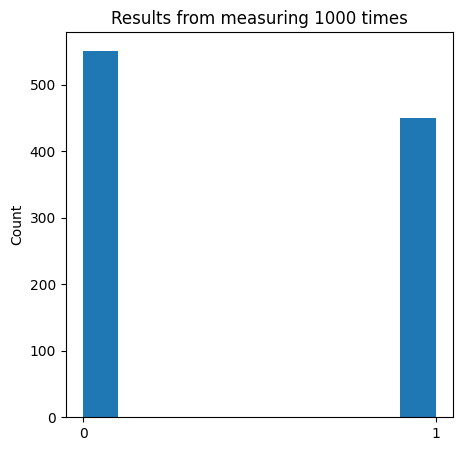

In [435]:
import matplotlib.pyplot as plt

results = np.empty([0])

num_runs = 1000

for i in range(num_runs): 
    results = np.append(results, v.measure()[0]) # storing resulting eigenvalues

num_0 = len(np.where(results == '0')[0]) # # measurements yielding 0
num_1 = len(np.where(results == '1')[0]) # # measurements yielding 1 

fig, axis = plt.subplots(1, 1, figsize = (5, 5))
plt.hist(results) 
plt.title(f"Results from measuring {num_runs} times")
plt.ylabel("Count")

print("{:>3} | {:>3}".format("# 0", "# 1"))
print("{:>3} | {:>3}".format(num_0, num_1))

Qiskit provides a way to visualize probabilities in a much *simpler* and *direct* way using the `plot_histogram` method in `qiskit.visualization`.

{'0': 535, '1': 465}


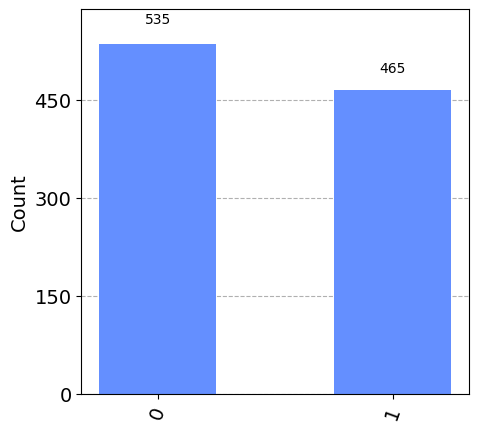

In [422]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000) # directly make 1000 measurements 
                                   # and store results in `statistics`
print(statistics) 
plot_histogram(statistics, figsize = (5, 5)) # makes histogram directly

We see the results are almost identical. If we took an infinite number of measurements and collected all the results, we would see the probabilities match with what's predicted from the wavefunction/statevector. 

By now you shold start to feel that Qiskit is just python. Of course, it is known Qiskit is just a python librray, however for many it seems like an entire new language. One just has to understand how to work with all the features of Qiskit *within* python. The first step is understanding all the quantum gates/operators. 

---

## Single-Qubit Quantum Gates / Operators

We start with the Pauli Operators that are used when measuring spins of elementary particles. Spin is one of the ways qubits are defined in real-life. (spin up $|\uparrow\rangle$ could mean $|0\rangle$ and spin down $|\downarrow\rangle$ could mean $|1\rangle$).

#### Pauli-X (NOT) Operator

The simplest logic gate is the Pauli-X / NOT operator. It inverts a value of a qubit from $0\rightarrow 1$ or $1\rightarrow0$, assuming we are in the computational basis. Its matrix representation is accordingly, 

$$ \hat{X} \equiv \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} $$ 

We can see its action on the following statevector $|0\rangle = v= \begin{pmatrix} 1 \\ 0 \end{pmatrix}$

In [288]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]]) # Pauli X Operator

v_initial = Statevector([1, 0]) # Statevector

print("Starting Statevector:")
display(v_initial.draw("latex"))

v_final = v_initial.evolve(X) # applies X on v_i

print("Post Pauli-X Operator:")
display(v_final.draw("latex"))

Starting Statevector:


<IPython.core.display.Latex object>

Post Pauli-X Operator:


<IPython.core.display.Latex object>

If we apply two X-gates in succession, we see the qubit flip back to its original state $|0\rangle$

In [289]:
v_intermediate = v_initial.evolve(X)
v_final = v_intermediate.evolve(X)

print("Starting statevector:") 
display(v_initial.draw("latex"))

print("Post 1 Pauli-X Operator:") 
display(v_intermediate.draw("latex"))

print("Post 2 Pauli-X Operators:")
display(v_final.draw("latex"))

Starting statevector:


<IPython.core.display.Latex object>

Post 1 Pauli-X Operator:


<IPython.core.display.Latex object>

Post 2 Pauli-X Operators:


<IPython.core.display.Latex object>

Let's introduce the other 2 Pauli Operators (besides the identity -- which you already know). 

---

#### Pauli Y Operator

$$ \hat{Y} \equiv \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} $$

#### Pauli Z Operator 

$$ \hat{Z} \equiv \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} $$ 

While not important right now, just like how we saw previously the $X$ gate performs the "bit-flip" operation,

The $Z$ gate performs a "phase-flip" operation: 

$$ Z|0\rangle = |0\rangle \qquad Z|1\rangle = -|1\rangle $$

The $Y$ gate performs both a bit-flip and a phase-flip. Phase operations are any operation described by the matrix 

$$ P_\theta = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{pmatrix} $$

(i.e. they leave the $|0\rangle$ constant and tack on a phase to the $|1\rangle$ component). The $Z$ operator is the case of $P_\pi$.

There are also other important operators: 

---

#### Hadamard Operator 

$$ \hat{H} \equiv \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $$ 

The Hadamard Gates puts (some) qubits into a superposition. In the case of the computational basis states $\{|0\rangle, |1\rangle\}$, 

$$ H|0\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{pmatrix} = |+\rangle $$

$$ H|1\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{pmatrix} = |-\rangle $$

Peforming the same operations instead on $|+\rangle$ and $|-\rangle$, 

$$ H|+\rangle = |0\rangle $$
$$ H|-\rangle = |1\rangle $$

Since both $ |+\rangle $ and $ |-\rangle $ carry the same probabilitiy distributions for measuring 0 or 1, measuring either $|+\rangle$ or $|-\rangle$ provides no information on what the initial state actually was. But by performing the $H$ gate like you see above, we obtain 0 with certainty that the initial state was $|+\rangle$ and we obtain 1 with certainty that the intiial state was $|-\rangle$.

#### T Gate 

The T gate is the equivalent to a $P_{\pi/4}$ phase operation. That is, 

$$ T \equiv \begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{pmatrix} $$

---

## Quantum Gates Review 

Let's define a quantum circuit using `qiskit.QuantumCircuit` and implement some gates we've discussed. 

In [199]:
from qiskit import QuantumCircuit 

circuit = QuantumCircuit(1) # initialize circuit with 1 qubit

circuit.x(0)
circuit.y(0) 
circuit.z(0) 

circuit.draw()

┌───┐┌───┐┌───┐
q: ┤ X ├┤ Y ├┤ Z ├
   └───┘└───┘└───┘

In [313]:
ket0 = Statevector([1, 0])

v = ket0.evolve(circuit) # Apply the circuit above on the |0> statevector
                         # Note the operations are applied sequentially
                         # left-to-right

print("The initial vector:") 
display(ket0.draw("latex"))

print("The resultant vector:")
display(v.draw("latex"))


The initial vector:


<IPython.core.display.Latex object>

The resultant vector:


<IPython.core.display.Latex object>

Let's apply the Hadamard $H$ gate on a $|0\rangle$. 

For the following code segments, predict first what the output will be based on information about the gates provided above. 

In [314]:
circuit = QuantumCircuit(1) 

circuit.h(0) 
circuit.draw()

┌───┐
q: ┤ H ├
   └───┘

In [315]:
v = ket0.evolve(circuit) 
v.draw("latex")

<IPython.core.display.Latex object>

Applying the Hadamard Gate on `v` = $|+\rangle$ (same as applying two Hadamard Gates on `ket0` = $|0\rangle$: 

In [316]:
w = v.evolve(circuit) # Applying the same circuit on v 
                      # (a second hadamard gate on |0>)
w.draw("latex")

<IPython.core.display.Latex object>

We get back the original statevector. 

Now let's build some random circuit with a bunch of gates and apply it on $|0\rangle$

In [317]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0) 

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [321]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)

v.draw("latex")

<IPython.core.display.Latex object>

We get a very ugly statevector. Perhaps seeing its probability distribution will help. 

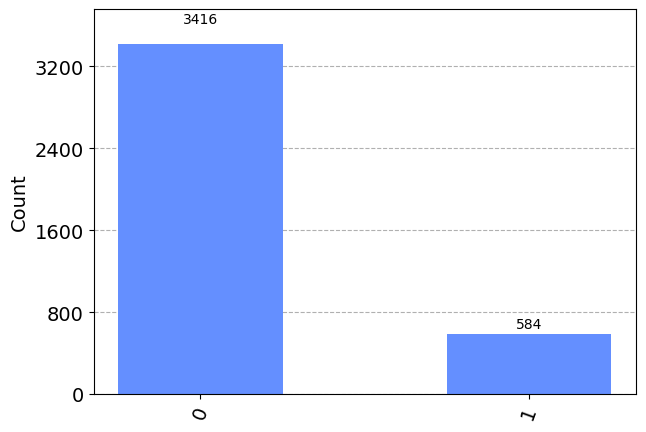

In [334]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)

---

## Multi-Qubit Quantum Gates / Operators

Now that we know how to work with single-qubit gates we move on to multi-qubit operators which act on more than one qubit/statevector. 

Remember a multi-qubit state $$|XY\rangle$$ is the tensor product

$$ |XY\rangle = |X\rangle \otimes |Y\rangle = |X\rangle|Y\rangle$$

---

### SWAP 
$$ \text{SWAP} |a\rangle |b\rangle = |b\rangle |a\rangle $$

It's matrix representation 

$$ \text{SWAP} \equiv \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix} $$

### Controlled Operations

A controlled $U$ operator performs an action on a **target** qubit depending on the state of a **control** qubit. 

When dealing with the computational basis of $|0\rangle$ and $|1\rangle$ that defines each statevector, a controlled $U$ operation takes the form 

$$ CU = |0\rangle \langle 0| \otimes I_R + |1\rangle\langle 1| \otimes U $$

To make this idea clearer, let's discuss the CNOT gate. 

#### CX / CNOT

The action of a CNOT gate flips the target qubit if the control qubit is in the state $|1\rangle$ and leaves the target qubit alone if the control qubit is $|0\rangle$. To put it cleanly, 

| Before | After |
| :------: | :-----: |
| Control /  Target | Control / Target |
| $|0\rangle$   /   $|0\rangle$ | $|0\rangle$ / $|0\rangle$ |
| $|0\rangle$   /   $|1\rangle$ | $|0\rangle$ / $|1\rangle$ |
| $|1\rangle$   /   $|0\rangle$ | $|1\rangle$ / $|1\rangle$ |
| $|1\rangle$   /   $|1\rangle$ | $|1\rangle$ / $|0\rangle$ |

It leaves the control qubit alone regardless. In matrix representation 

$$ CNOT = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} $$

We can perform Controlled Operations using any single or even multi-qubit gate, and also make the control qubit a control multi-qubit system instead. 

We can also make the control qubit a two-qubit system but the target qubit only a single qubit. For example the CCNOT (controlled-controlled NOT) gate, also known as the Toffoli Gate -- a CNOT gate with *2* control qubits and *1* target qubit. That is, the target qubit gets inverted if and only if *both* control qubits are in the state $|1\rangle$. 

---

#### Tensor Products

Let's create the multi-qubit statevector $|01\rangle$ as a tensor product from $|0\rangle \otimes |1\rangle$. 

In [338]:
zero, one = Statevector.from_label("0"), Statevector.from_label("1")
zero.tensor(one).draw("latex")

<IPython.core.display.Latex object>

Let's create the vectors representing the states $|+\rangle$ and $\frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)$ states and combine them to form a new state vector $|\psi\rangle$. 

In [341]:
plus = Statevector.from_label("+")
i_state = Statevector([1/sqrt(2), 1j/sqrt(2)])

psi = plus.tensor(i_state)
psi.draw("latex")

<IPython.core.display.Latex object>

We can also take the tensor product of operators. The tensor product $C$ of the operators $C = X \otimes Y$ is an operator that can act on simultaneously on the 2 qubit system that is equivalent  to applying $X$ on the first qubit and $Y$ on the second and taking the tensor product after. 

To put it cleanly, the following circuit: 

In [351]:
circuit = QuantumCircuit(2)

circuit.x(0)
circuit.y(1) 
display(circuit.draw())

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ Y ├
     └───┘

is the same as applying the $C = X \otimes Y$ gate on the tensor product between both `q_0` and `q_1`. 

We can generate tensor products between operators in a similar fashion as for statevectors.

In [368]:
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1j], [1j, 0]])

C = X.tensor(Y)
print(C)

Operator([[0.+0.j, 0.-0.j, 0.+0.j, 0.-1.j],
          [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
          [0.+0.j, 0.-1.j, 0.+0.j, 0.-0.j],
          [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


Let's show that applying $X$ on qubit $|0\rangle$ and $Y$ on qubit $|1\rangle$ is the same as applying $C = X \otimes Y$ to $|01\rangle = |0\rangle \otimes |1\rangle$. 

In [386]:
ket0 = Statevector([1, 0])
ket1 = Statevector([0, 1])
ket_combined = ket0.tensor(ket1)

# individually applying X and Y to |0> and |1> separately
ket0f = ket0.evolve(X)
ket1f = ket1.evolve(Y)
ket_combinedf = ket0f.tensor(ket1f) 

print("X|0> ⊗ Y|1> ")
display(ket_combinedf.draw("latex"))

# applying combined operator to both, 
# redefining ket_combinedf using ket_combined 
ket_combinedf = ket_combined.evolve(X ^ Y) # X ^ Y = X ⊗ Y = C

print("(X ⊗ Y)|01>")
display(ket_combinedf.draw("latex"))

X|0> ⊗ Y|1> 


<IPython.core.display.Latex object>

(X ⊗ Y)|01>


<IPython.core.display.Latex object>

They're the same! Let's go back to the $|\psi\rangle$ vector we defined earlier, 

In [383]:
psi.draw("latex")

<IPython.core.display.Latex object>

Let's create a CNOT operator and calculate CNOT$|\psi\rangle$, or $CX|\psi\rangle$

In [384]:
CX = Operator(
    [
        [1, 0, 0, 0], 
        [0, 1, 0, 0], 
        [0, 0, 0, 1],
        [0, 0, 1, 0], 
    ]
)

psi.evolve(CX).draw("latex")

<IPython.core.display.Latex object>

Compare the coefficients of the $|10\rangle$ and $|11\rangle$ states.

---

### Partial Measurements

In the previous chapter, we used the `measure` method to simulate a measurement of a quantum statevector. This method returned the measured eigenvalue, and the resultant collapsed statevector post-measurement. 

By default, `measure` measures all qubits in the statevector, but we can provide a list of integers to *only* measure the qubits *at* those indices. To demonstrate, the cell below creates the state 

$$ W = \frac{1}{\sqrt{3}} ( |001\rangle + |010\rangle + |100\rangle). $$

In [4]:
W = Statevector([0, 1, 1, 0, 1, 0, 0, 0] / sqrt(3))
W.draw("latex")

<IPython.core.display.Latex object>

If you are confused how the above state was generated using `Statevector`, each indicy of 0 or 1 indicates which of the possible 3-qubit states we define: 

- $|000\rangle$ (index 0)
- $|001\rangle$ (index 1)
- $|010\rangle$ (index 2)
- $|011\rangle$ (index 3)
- $|100\rangle$ (index 4)
- $\vdots$ $\vdots$

As you can see, where each of these indices have a 1, defines which 3-qubits state we have. The above statevector $W$ has a 1 in index 1, 2, and 4. 

Let's simulate a measurement on the **rightmost** qubit (which has index 0) -- the opposite of normal convention (I don't know why, but there's probably a reason). 

In [9]:
eigenvalue, new_statevector = W.measure([0]) # measure qubit 0

print(f"Measured: {eigenvalue}\nState after measurement:")
new_statevector.draw("latex")

Measured: 0
State after measurement:


<IPython.core.display.Latex object>

Run the above cell a few times to see different results. Notice that measuring a `1` means we know both the other qubits are $|0\rangle$, but measuring a `0` means the remaining two qubits are in the state $$ \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle). $$

---

## Quantum Circuits Overview

Let's fully cover all the important aspects of Quantum circuits. 

In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

In [11]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw())

┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

If we wish to set the name of our single qubit to something other than `q`, we use the `QuantumRegister` class like this: 

In [13]:
X = QuantumRegister(1, "X")
circuit = QuantumCircuit(X)

circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw())

┌───┐┌───┐┌───┐┌───┐
X: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

In Qiskit, the *topmost* qubit in a circuit diagram has index 0 and corresponds to the *rightmost* position in a tuple of qubits. Qiskit's default names for the qubits in an $n$-qubit circuit are represented by the $n$-tuple $(q_{n-1}, \cdots, q_0)$, with $q_0$ being the qubit on top and $q_{n-1}$ on the bottom in quantum circuit diagrams. 

We can also create a 2-qubit gate like so: 

In [24]:
circuit_default = QuantumCircuit(2)

circuit_default.h(0)
circuit_default.cx(0, 1)

display(circuit_default.draw())

#-----------------------------#

X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")

circuit_named = QuantumCircuit(X, Y)

circuit_named.h(X)
circuit_named.cx(X, Y)

display(circuit_named.draw())

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

┌───┐     
X: ┤ H ├──■──
   └───┘┌─┴─┐
Y: ─────┤ X ├
        └───┘

We have created two identical circuits, one default-named, and the other custom. Both circuits contain a Hadamard Gate on the first qubit and a CNOT gate with the first qubit as the control and the second as the target. 

Let's see the action of the above circuit on the standard computational basis states for a 2-qubit system: 

$$|00\rangle \quad |01\rangle \quad |10\rangle \quad |11\rangle$$

In [66]:
zero = Statevector.from_label("0")
one = Statevector.from_label("1")

standard_basis_states = [zero.tensor(zero), zero.tensor(one), 
                         one.tensor(zero), one.tensor(one)]

names = ["|00>", "|01>", "|10>", "|11>"]

for i in range(len(standard_basis_states)): 
    print(f"{names[i]} -->")
    display(standard_basis_states[i].evolve(circuit_named).draw("latex"))

|00> -->


<IPython.core.display.Latex object>

|01> -->


<IPython.core.display.Latex object>

|10> -->


<IPython.core.display.Latex object>

|11> -->


<IPython.core.display.Latex object>

The cool thing about the circuit above, as you see, it generates the bell states (entangled states that form a basis): 

$$|\phi^+\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle $$
$$|\phi^-\rangle = \frac{1}{\sqrt{2}}|00\rangle - \frac{1}{\sqrt{2}}|11\rangle $$
$$|\psi^+\rangle = \frac{1}{\sqrt{2}}|01\rangle + \frac{1}{\sqrt{2}}|10\rangle $$
$$|\psi^-\rangle = \frac{1}{\sqrt{2}}|01\rangle - \frac{1}{\sqrt{2}}|10\rangle $$

except the final $|11\rangle$ state becomes the negative of the fourth $|\psi^-\rangle$ bell state. 

So this circuit gives us a way to convert the standard computational basis into the Bell Basis. The -1 phase factor on the last state, $-|\psi^-\rangle$ could be eliminated if we wanted. For instance, we could add a controlled-Z gate at the beginning. (The Z gate performs the bit-flip operation. So a controlled-Z would perform a bit-flip if the first qubit is 1 --> turning $|11\rangle$ into -$|11\rangle$)

Here is the altered circuit shown: 

In [67]:
circuit = QuantumCircuit(2)

circuit.cz(0, 1)
circuit.h(0)
circuit.cx(0, 1)

circuit.draw()

┌───┐     
q_0: ─■─┤ H ├──■──
      │ └───┘┌─┴─┐
q_1: ─■──────┤ X ├
             └───┘

Implementing the above circuit on the standard computational basis states: 

In [71]:
for i in range(len(standard_basis_states)):
    print(f"{names[i]} --> ")
    display(standard_basis_states[i].evolve(circuit).draw("latex"))

|00> --> 


<IPython.core.display.Latex object>

|01> --> 


<IPython.core.display.Latex object>

|10> --> 


<IPython.core.display.Latex object>

|11> --> 


<IPython.core.display.Latex object>

which is identical to the Bell Basis! 

In general, quantum circuits can contain any number of qubit wires. We may also include classical bit wires, indicated by **double** lines:

In [10]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B") # Using `Classical Register` to customize the name
                              # for two separate classical bits

circuit = QuantumCircuit(X, Y, A, B)
circuit.h(X)
circuit.cx(X, Y)
circuit.measure(X, A)
circuit.measure(Y, B)

display(circuit.draw())

┌───┐     ┌─┐   
  X: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  Y: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
A: 1/═══════════╩══╬═
                0  ║ 
B: 1/══════════════╩═
                   0

In this circuit, we have the same hadamard gate & CNOT on two qubits, just like in the previous example. However now we also have two ***classical**** bits, A and B, with two measurement gates. The measurement gates represent standard basis measurements (resulting in either $|0\rangle$ or $|1\rangle$ as the eigenvectors). The qubits are changed to their post-measurement states, while the classical measurement outcomes are *overwritten* onto the classical bits to which the arrows point. 

The circuit can be simulated using the `Sampler()` primitive. 

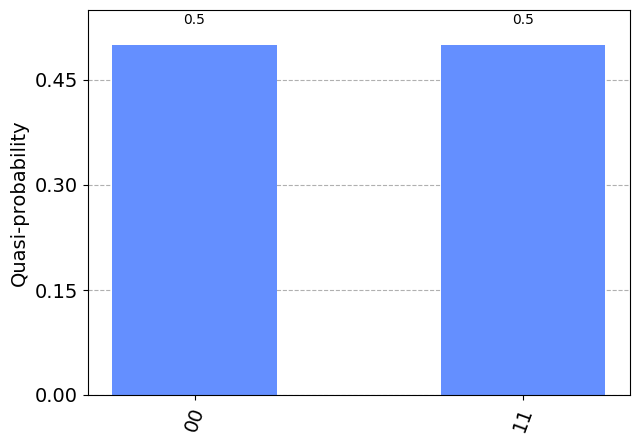

In [20]:
sampler = Sampler() # Initialize Sampler
job = sampler.run(circuit) 
results = job.result()

statistics = results.quasi_dists[0].binary_probabilities()
plot_histogram(statistics)

The `Sampler()` primitive samples outputs of quantum circuits. It displays the **exact** measurement probabilities of a circuit if the `shots` parameter is not specified. We use it by calling its `run()` method with the circuit. This resuls a `BasePrimitiveJob` object, where calling the method `result()` results in output samples and corresponding metadata.

It is not important to memorize how to use primitives or any of these methods. I just used them to display how there is an equal probability of yielding the eigenvectors $|00\rangle$ and $|11\rangle$ (because the hadamard and CNOT yield the bell basis) and how they changed into 00 and 11 following the measurement gate onto the classical bit wires. 

## Quantum Circuits Review

Let's play with some qubits and bits in a complicated circuit and plot the resultant probabilities.

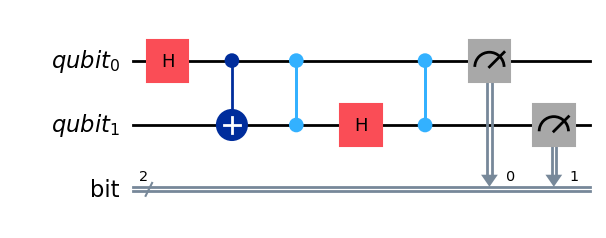

In [185]:
q = QuantumRegister(2, name = 'qubit')
c = ClassicalRegister(2, name = 'bit')

circuit = QuantumCircuit(q, c)

circuit.h(q[0])
circuit.cx(q[0], q[1])      # Note you do not have to specify q[...]
circuit.cz(q[1], q[0])      # I just do it for readability
circuit.h(q[1])
circuit.cz(q[0], q[1])
circuit.measure(q, c)

circuit.draw('mpl')

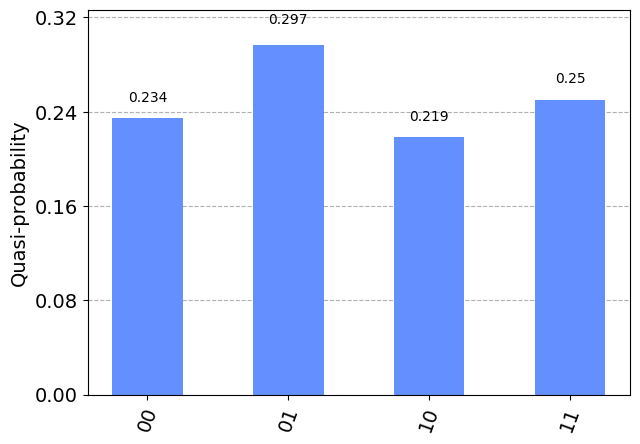

In [187]:
sampler = Sampler() # sampler initialization

job = sampler.run(circuit, shots = 128) # sampling 128 runs
results = job.result()

statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

We see we get roughly an equal 1/4 probabilitiy to yield each computational basis state in its classical form. Let us see this result more closely by performing this circuit on the computational basis states: 

In [190]:
# Generating the same circuit, but without the measurement gates
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)      
circuit.cz(1, 0)      
circuit.h(1)
circuit.cz(0, 1)

zero, one = Statevector.from_label("0"), Statevector.from_label("1")

standard_basis_states = [zero.tensor(zero), zero.tensor(one), 
                         one.tensor(zero), one.tensor(one)]
names = ["|00>", "|01>", "|10>", "|11>"]

for i in range(len(standard_basis_states)): 
    print(f"{names[i]} -->")
    display(standard_basis_states[i].evolve(circuit).draw("latex"))

|00> -->


<IPython.core.display.Latex object>

|01> -->


<IPython.core.display.Latex object>

|10> -->


<IPython.core.display.Latex object>

|11> -->


<IPython.core.display.Latex object>

Here we can clearly see the probabilities for all eigenvectors are 1/4. 

However, let us apply the circuit on a different statevector. 

In [188]:
plus = Statevector.from_label("+")
vec = Statevector([(1 + 2.0j)/3, -2/3])
statevec = plus.tensor(vec)

display(statevec.draw('latex'))

<IPython.core.display.Latex object>

This statevector is a tad bit more complicated... Let's see what the circuit does to it.

In [197]:
display(statevec.evolve(circuit).draw('latex'))

<IPython.core.display.Latex object>

Now the only possible measurements are either $|00\rangle$ or $|11\rangle$! 